In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

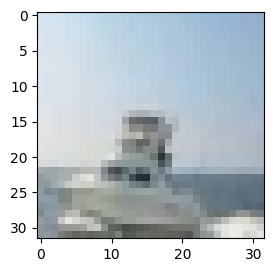

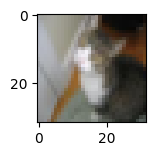

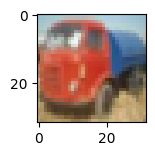

In [ ]:
n=3
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i+100])
  plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm # Change maxnorm to MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical  # Import to_categorical instead of np_utils

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [ ]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)
num_classes=test_Y.shape[1]

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 158ms/step - accuracy: 0.2982 - loss: 1.9165 - val_accuracy: 0.5084 - val_loss: 1.3833
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 253s 152ms/step - accuracy: 0.5022 - loss: 1.3797 - val_accuracy: 0.5702 - val_loss: 1.1951
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 243s 155ms/step - accuracy: 0.5800 - loss: 1.1815 - val_accuracy: 0.6045 - val_loss: 1.1298
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 154ms/step - accuracy: 0.6378 - loss: 1.0197 - val_accuracy: 0.6321 - val_loss: 1.0593
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 152ms/step - accuracy: 0.6728 - loss: 0.9214 - val_accuracy: 0.6556 - val_loss: 0.9946
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 153ms/step - accuracy: 0.7128 - loss: 0.8142 - val_accuracy: 0.6720 - val_loss: 0.9420
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 156ms/step - accuracy: 0.7488 - loss: 0.7121 - val_accuracy: 0.6625 - val_loss: 1.0155
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 240s 154ms/step - ac

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6674 - loss: 1.0652
66.50999784469604


In [ ]:
model.save("model1_cifar_10epoch.h5")